In [60]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix

In [61]:
X = np.load('../../datasets/Digits/X_digits_0_1.npy')
y = np.load('../../datasets/Digits/y_digits_0_1.npy')

In [62]:
print("Number of samples:", X.shape[0])
print("Shape of each image:", X.shape[1:])

Number of samples: 360
Shape of each image: (8, 8)


In [63]:
print("Entire Array for First image\n", X[0]) # in hex digits

Entire Array for First image
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


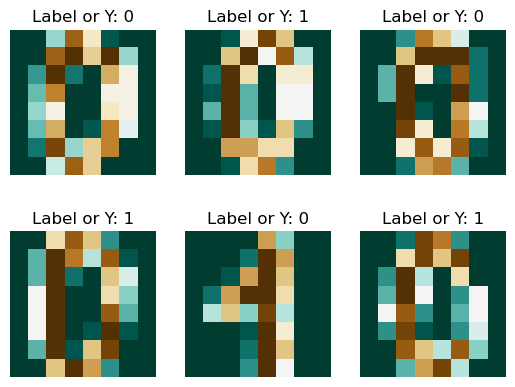

In [64]:
plt.Figure(figsize=(6, 3))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[2*i], cmap='BrBG_r')
    plt.title(f"Label or Y: {y[i]}")
    plt.axis('off')
    
plt.show()

In [65]:
X = X.reshape(X.shape[0], -1)

# print(X[0])

In [66]:
XTrain, XTest, YTrain, YTest = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [67]:
print("Training samples:", XTrain.shape[0])
print("Testing samples:", XTest.shape[0])

Training samples: 288
Testing samples: 72


In [74]:
model = SVC(kernel = 'linear', C = 1000) # Positive Value > 0 
# Range can be 0.01 - 1(default) - 100
# Can Go for even 1000 

model.fit(XTrain, YTrain)

SVC(C=1000, kernel='linear')

In [75]:
pred = model.predict(XTest)

In [76]:

# Confusion Matrix
ConfMatrix = confusion_matrix(YTest, pred)
# [[TN, FP],
#  [FN, TP]]

TrueNegatives  = ConfMatrix[0, 0]
FalsePositives = ConfMatrix[0, 1]
FalseNegatives = ConfMatrix[1, 0]
TruePositives  = ConfMatrix[1, 1]

# Performance Metrics
Accuracy  = accuracy_score(YTest, pred)
Precision = precision_score(YTest, pred)
Recall    = recall_score(YTest, pred)
F1Score   = f1_score(YTest, pred)
Specificity = TrueNegatives / (TrueNegatives + FalsePositives)

TPR = TruePositives / (TruePositives + FalseNegatives)   # Sensitivity
FPR = FalsePositives / (FalsePositives + TrueNegatives)

# Printing results
print("Confusion Matrix:")
print(ConfMatrix)
print()
print(f"True Negatives (TN): {TrueNegatives}")
print(f"False Positives (FP): {FalsePositives}")
print(f"False Negatives (FN): {FalseNegatives}")
print(f"True Positives (TP): {TruePositives}\n")

print("Derived Performance Metrics:")
print(f"Accuracy: {Accuracy:.2f}")
print(f"Precision: {Precision:.2f}")
print(f"Recall (Sensitivity / TPR): {Recall:.2f}")
print(f"F1-Score: {F1Score:.2f}")
print(f"Specificity: {Specificity:.2f}")
print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")


Confusion Matrix:
[[35  0]
 [ 0 37]]

True Negatives (TN): 35
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 37

Derived Performance Metrics:
Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity / TPR): 1.00
F1-Score: 1.00
Specificity: 1.00
True Positive Rate (TPR): 1.00
False Positive Rate (FPR): 0.00
